<a href="https://colab.research.google.com/github/bjin2364/mit-deep-learning/blob/main/the_problem_of_generalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np              # numerical computing library
import matplotlib.pyplot as plt # plotting library

In [2]:
# create some random data
np.random.seed(2) # set random seed for reproducibility

def data_generator(Nsamples): # p_data
  x = np.random.randn(Nsamples,1)
  y = 0.5*x**2 + 0.2*np.random.randn(Nsamples,1)
  return x, y

# training data
x_train, y_train = data_generator(Nsamples=10)

# validation data
x_val, y_val = data_generator(Nsamples=10)

# test data
x_test, y_test = data_generator(Nsamples=3)

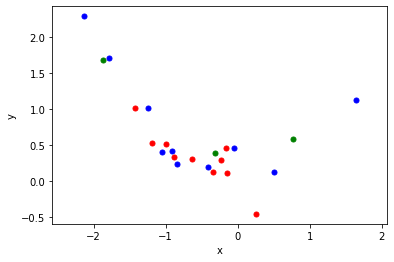

In [3]:
# plot the data
def plot_data(x,y,c):
  plt.plot(x, y, 'o', markersize=5, color=c)
  plt.axis('equal')
  plt.xlabel('x')
  plt.ylabel('y')

plot_data(x_train, y_train, 'blue')
plot_data(x_val, y_val, 'red')
# --> to try: plot test data in a different color
plot_data(x_test, y_test, 'green')

In [4]:
# polynomial basis expansion of the data
def basis_expansion(x,k):
  X = np.ones(x.shape)
  for i in range(k):
    X = np.hstack([X, x**i]) # stack x^i in the columns of a matrix, creating the row-vector [x^0, x^1, ..., x^k]
  return X

In [10]:
# least squares linear regression over the polynomial basis
def train(x,y,k): # "train" and "fit" are interchangeable words for finding a model that minimizes prediction error on over some training data
  X = basis_expansion(x,k)
  w = np.linalg.lstsq(X, y, rcond=None)[0]
  # --> question: what about the bias b? do we need it?
  return w

w = train(x_train,y_train,k=10)

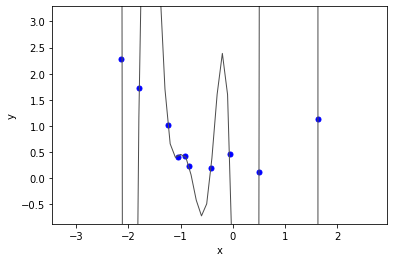

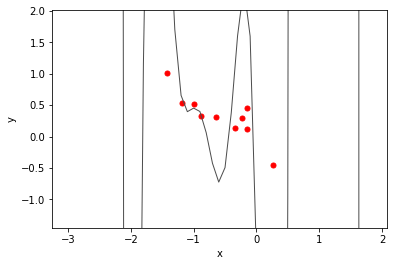

In [11]:
# make a predictions for value of y over an interval of input values for x
def predict(x,w):
  k = w.shape[0]-1 # count up the number of basis functions that were used
  X = basis_expansion(x,k)
  y = np.matmul(X,w)
  return y

x_fit = np.expand_dims(np.arange(np.floor(np.min(x_train)),np.ceil(np.max(x_train)),0.1), axis=1) # interval to make predictions over
y_fit = predict(x_fit,w)

def plot_fit(x_data, y_data, x_fit, y_fit, c):
  plot_data(x_data,y_data,c=c)
  plt.plot(x_fit,y_fit, color=[0.3,0.3,0.3], linewidth=1)
  plt.xlim((np.min(x_data)-1,np.max(x_data)+1))
  plt.ylim((np.min(y_data)-1,np.max(y_data)+1))

plt.figure()
plot_fit(x_train, y_train, x_fit, y_fit, 'blue')
plt.figure()
plot_fit(x_val, y_val, x_fit, y_fit, 'red')

Mean squared error on train set: 0.02
Mean squared error on val set: 5.42


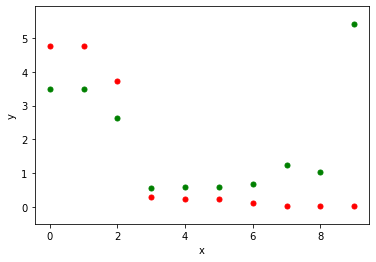

In [26]:
# measure error
def check(x,y,w):
  y_pred = predict(x,w)
  mse = ((y_pred-y)**2).sum()
  return mse

print('Mean squared error on train set: {:1.2f}'.format(check(x_train,y_train,w)))
print('Mean squared error on val set: {:1.2f}'.format(check(x_val,y_val,w)))

# --> to try: plot error as a function of k
all_k = []
train_error = []
val_error = []
for k in range(10):
  all_k.append(k)
  w = train(x_train,y_train,k)
  val_error.append(check(x_val,y_val,w))
  train_error.append(check(x_train,y_train,w))

plot_data(all_k,val_error,'g')
plot_data(all_k, train_error,'r')


Mean squared error on val set: 0.56
Best model using k=3


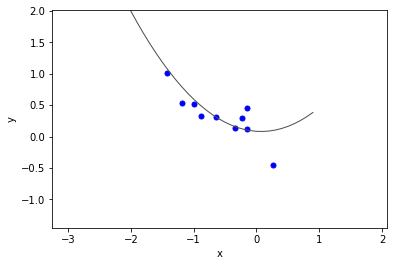

In [28]:
# pick the model that obtains the lowest error on the validation set
mse_best, w_best, k_best = None, None, None
for k in range(20):
  w = train(x_train,y_train,k) # train
  val_mse = check(x_val,y_val,w) # check error on the val set

  if mse_best is None or val_mse < mse_best:
    mse_best = val_mse
    w_best = w
    k_best = k

x_fit = np.expand_dims(np.arange(np.floor(np.min(x_val)),np.ceil(np.max(x_val)),0.1), axis=1) # interval to make predictions over
y_fit = predict(x_fit,w_best)
plot_fit(x_val, y_val, x_fit, y_fit, 'blue')
print('Mean squared error on val set: {:1.2f}'.format(check(x_val,y_val,w_best)))
print('Best model using k={}'.format(k_best))

# --> to try: is the best model on the val set the same as the best model on the test set? try measuring this and see. what is going on?

In [ ]:
# regularized regression
# --> to try: Add a regularizer that penalizes the L2 norm of the weights w. 
#             You can import sklearn.linear_model.Ridge, which will do this for you, 
#             but it is also a useful exercise to derive the closed form optimizer, 
#             which is provided in the lecture slides, and write it out in raw numpy,
#             using matmuls, addition, etc  